#         THU THẬP DỮ LIỆU THEO PHƯƠNG PHÁP KHỞI TẠO

## Để giải quyết bài toán phát âm chuẩn trong tiếng Anh thì nhận diện từ vựng bằng giọng nói (speech-to-text) là một vấn đề rất quan trọng trong bài toán này. Giải quyết được vấn đề trên hiện có rất nhiều phương pháp để thu thập dữ liệu:
- 1. Thu thập thủ công vẫn là một phương pháp hiệu quả nhất mang độ thực tế cao, nhưng yêu cầu đòi hỏi rất nhiều thời gian. phương pháp đem lại chất lượng nhưng có mặt hạn chế về số lượng, điều mà mô hình rất càn thiết
- 2. Sử dụng các âm thanh video trên internet bằng phương pháp tách nhỏ cũng là một cách mới mẻ và hiệu quả nhưng yêu cầu phải có nhiều tập dữ liệu để giảm đi overfitting.
- 3. Có thêm một phương pháp khá thú vị nhanh chóng đó là chúng ta sẽ sử dụng một số thư viện phát âm chuẩn để khởi tạo âm thanh bằng nhưng từ vựng phổ biến. Phương pháp này yêu cầu phải chọn được một thư viện phát âm chuẩn và giống với giọng nói tự nhiên.

## Dưới đây chúng ta sẽ triển khai thử nghiệm phương pháp thứ 3
- Sau khi đã có dữ liệu phát âm chuẩn thì chúng ta có thể sử dụng một số kỹ thuật tăng cường dữ liệu để làm dữ liệu chúng ta phong phú hơn, để mô hình nhận diện chính xác hơn và thực tế hơn.

## **1. Tập hợp 1000 từ vựng thông dụng phổ biến nhất (đọc file excel)**

In [1]:
import pandas as pd
import numpy as np
# Tải dữ liệu từ vựng

# Đọc file Excel
df = pd.read_excel("1000.xls", engine="xlrd")
data_text = df['the ']

## 2. Sử dụng các thư viện có giọng đọc tự nhiên và phát âm chuẩn để khởi tạo dữ liệu
- Hiện nay có rất nhiều thư viện như :  pyttsx3 , SpeechRecognition , Voxygen (API bên ngoài) , Amazon Polly (AWS) , Voxygen....
- Cũng như các thư viện khác gTTS (Google Text-to-Speech) cũng được đánh giá rất cao về phát âm chuẩn và ưu thế về độ tự nhiên nên chúng ta sẽ chọn gTTS là một thư viện rất lý.

In [3]:
from gtts import gTTS
import soundfile as sf
#Đọc cac từ trong danh sách
for textt in data_text:
    tts = gTTS(text=textt, lang='en')
    #lưu vào một data riêng
    tts.save(f'data/data_chuan/{textt}.mp3')

## 3. Sử dụng những dữ liệu vừa khởi tạo và phương pháp tăng cường dữ liệu
- Hiện tại chúng ta đã có mỗi từ vụng đều là một đoạn âm thanh phát âm chuẩn, bước tiếp theo chúng ta sẽ tăng cường nhân bản mỗi đoạn thành những đoạn âm thanh có tốc độ đọc, giọng nói, và môi trường khác nhau (âm thanh bị nhiễu)

*Tạo 1 hàm tăng cường âm thanh*

In [35]:
import librosa
import numpy as np
import os
import soundfile as sf
from gtts import gTTS

# Tăng cường bằng các kỹ thuật khác nhau
def augment_audio(output_dir, y, sr, index):
    # Time Stretch (tăng tốc độ index)
    y_stretch = librosa.effects.time_stretch(y, rate=1+index/10)
    sf.write(f'data/{output_dir[:-1]}/time_stretch_{index}.mp3', y_stretch, sr)

    # Pitch Shift (tăng cao độ index nốt)
    y_shift = librosa.effects.pitch_shift(y, sr=sr, n_steps=4+index)
    sf.write(f'data/{output_dir[:-1]}/pitch_shift_{index}.mp3', y_shift, sr)

    # Thêm nhiễu Gaussian Noise
    noise = np.random.randn(len(y))
    y_noise = y + 0.005 * noise
    sf.write(f'data/{output_dir[:-1]}/add_noise_{index}.mp3', y_noise, sr)


print("Dữ liệu âm thanh tăng cường đã được tạo và lưu!")

Dữ liệu âm thanh tăng cường đã được tạo và lưu!


*Khởi tạo nhiều thư mục tương ứng với từng từ vựng, mỗi thư mục chứa 30 kiểu âm thanh khác nhau*

In [36]:
for text in data_text :
    # Tải file âm thanh gốc
    y, sr = librosa.load(f'data/data_chuan/{text}.mp3')
    # Thư mục lưu dữ liệu âm thanh tăng cường
    os.makedirs(f'data/{text}', exist_ok=True)
    for i in range(10):  # Tạo 30 phiên bản dữ liệu mới
        augment_audio(text, y, sr, i)

print("Dữ liệu âm thanh tăng cường đã được tạo và lưu!")

Dữ liệu âm thanh tăng cường đã được tạo và lưu!


## Vậy là chúng ta đã có một bộ dữ liệu phong phú với 30.000 đoạn âm thanh khác nhau với 1.000 từ vựng phổ biến , và có thể tăng thêm nếu cần thiết.
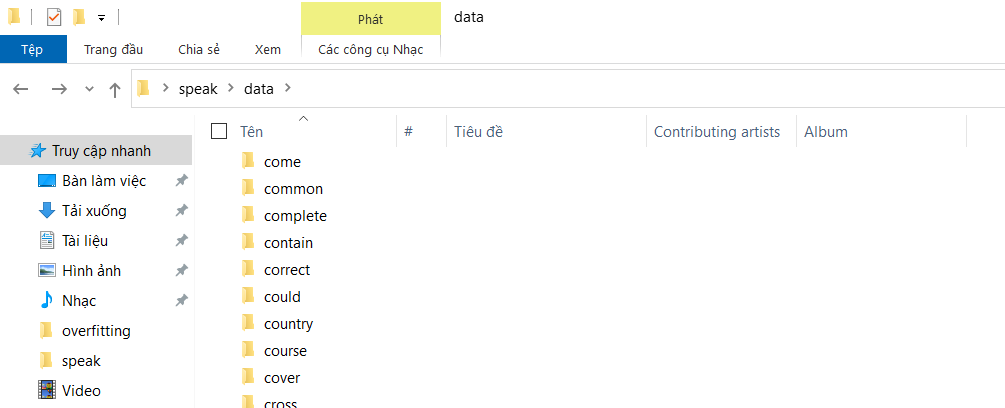
.
## Mỗi tệp sẽ có 30 kiểu âm thanh như sau :
.
.
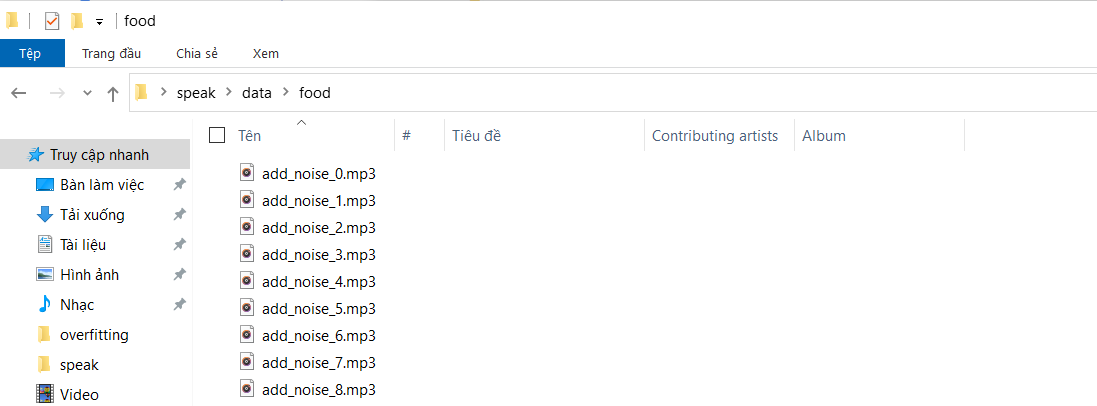